<div class='alert alert-info'>
    <h1 align="center">Principal Components Analysis (PCA)</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

Principal Component Analysis (PCA) is a powerful statistical method commonly used for dimensionality reduction in data analysis and machine learning. It's particularly useful when dealing with datasets with a large number of variables, as it helps to simplify the complexity of the data while retaining its essential characteristics.

At its core, PCA aims to transform the original variables into a new set of variables called principal components. These components are linear combinations of the original variables and are orthogonal to each other, meaning they are uncorrelated. The first principal component accounts for the maximum variance in the data, followed by the second, third, and so on, each capturing decreasing amounts of variance.

PCA works by identifying the directions, or axes, in the data that capture the most variation. It then projects the data onto these axes, effectively reducing the dimensionality of the dataset while preserving the most important information. This reduction in dimensionality can lead to simpler models, easier visualization, and improved computational efficiency.

In addition to dimensionality reduction, PCA is also used for data visualization, noise reduction, feature extraction, and pattern recognition. It finds applications in various fields such as image processing, genetics, finance, and natural language processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()

Let's generate a synthetic dataset with two features and 200 samples, where the two features are linearly correlated.

When you perform matrix multiplication, each column of the resulting dataset is essentially a linear combination of the columns of the original data matrix, with the coefficients determined by the transformation matrix. Because the transformation matrix is random, it's likely that it will have non-zero values in both rows and columns. This means that each feature of the resulting dataset will be a combination of both features of the original data, although with different weights. As a result, the two features of the resulting dataset will be correlated.

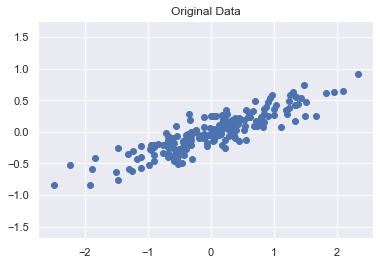

In [2]:
# setting the random seed for reproducibility
rng = np.random.RandomState(1)

# generating correlated data
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.axis('equal')
plt.show()

It is clear that there is a nearly linear relationship between the x and y variables. In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

# PCA Implementation

PCA works by transforming the original variables of a dataset into a new set of variables, called principal components, that are linear combinations of the original variables. Here's a step-by-step explanation of how PCA works:

1. **Standardization**: Before performing PCA, it's common practice to standardize the data by subtracting the mean and dividing by the standard deviation for each variable. This ensures that all variables are on the same scale, which is important because PCA is sensitive to the scale of the variables.
$$ z=\frac{x-\bar{x}}{\sigma} $$

2. **Covariance Matrix**: PCA calculates the covariance matrix of the standardized data. The covariance matrix provides information about the relationships between pairs of variables (features) in the dataset. It shows how much two variables vary together. The result of $ X^T X $ is $ n \times n $, where $n$ is the number of features and each element in the covariance matrix represents the covariance between two features.
$$ C = \frac{1}{m-1} \sum_i (X_i - \bar{X})(X_i - \bar{X})^T = \frac{1}{m-1} X^T X $$

3. **Singular Value Decomposition (SVD)**: Next, PCA performs singular decomposition on the covariance matrix. SVD decomposes the standardized data matrix into three matrices: $U$, $S$, and $V$, such that $X = USV^T$.
    - $U$: Left singular vectors, representing the principal components.
    - $S$: Singular values, indicating the importance of each principal component.
    - $V$: Right singular vectors, not directly used in PCA.

4. **Selecting Principal Components**: PCA sorts the eigenvalues in descending order to rank the principal components by the amount of variance they capture. The principal component with the highest eigenvalue (the largest variance) is the first principal component, the second-highest eigenvalue corresponds to the second principal component, and so on.

5. **Projection**: Finally, PCA projects the original data onto the principal components. This involves multiplying the standardized data matrix by the matrix of eigenvectors corresponding to the selected principal components. The resulting transformed data contains the scores along each principal component, effectively reducing the dimensionality of the dataset.
$$ \text{Projected data } = \text{Standardized data } \times \text{Feature vector } $$
$$ (m \times k) \hspace{2cm} (m\times n) \hspace{2.5cm} (n\times k)$$

$$ \text{Recovered data } = \text{Projected data } \times \text{Transposed Feature vector} $$
$$ (m \times n) \hspace{2.cm}  (m\times k)  \hspace{2.5cm} (k\times n)$$

By retaining only the principal components that capture most of the variance in the data, PCA allows for dimensionality reduction while preserving the most important information. The reduced-dimensional data can be used for visualization, analysis, or as input to machine learning algorithms.

In [3]:
def myPCA(X, k=2):
    
    """ Principal Component Analysis implementation
    Arguments:
        - X: data matrix - numpy array of shape (m samples, n features)
        - k: number of components
        
    Returns:
        - U: The matrix containing the principal components as its columns.
        - S: The singular values.
        - X_proj: The data matrix projected onto the subspace spanned by the first k principal components.    
    """
    
    m = X.shape[0]
    
    # Step 1: standardized the data
    Xn = (X - X.mean(axis=0)) #/ X.std(axis=0)
    
    # Step 2: compute covariance matrix
    Sigma = (Xn.T @ Xn) / (m-1)
    
    # Step 3: Singular Value Decomposition
    U, S, V = np.linalg.svd(Sigma)
    
    # Step 4 and 5: Projected data
    X_proj = Xn @ U[:, :k]
    
    return U, S, X_proj

Let's apply the `myPCA` function to the dataset X and then prints information about the principal components and their contributions to the total explained variance.

Number of components: 2
Total explained variance: 1.0000
Principal Component 1: [-0.94446029 -0.32862557] with the singular value 0.7625
Principal Component 2: [-0.32862557  0.94446029] with the singular value 0.0185


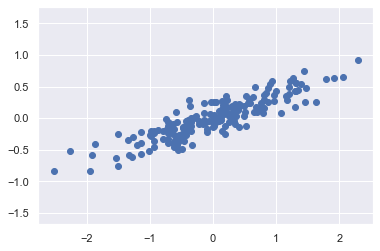

In [4]:
k = 2
U, S, X_proj = myPCA(X, k)

# cumulative explained variance ratio
total_var = np.cumsum(S) / np.sum(S)

print('Number of components: %d' %k)

print('Total explained variance: %.4f' %total_var[k-1])

for i in range(k):
    print('Principal Component %d:' %(i+1), U[i],
          'with the singular value %.4f' %S[i])

# recover X values from the projected data using the principal components
X_recovered = X_proj @ U[:,:k].T

plt.scatter(X_recovered[:, 0], X_recovered[:, 1])
plt.axis('equal')
plt.show()

Let's check our results with sklearn PCA object.

In [5]:
from sklearn.decomposition import PCA

In [6]:
k = 2

# PCA is fitted to the standardized data
# sklearn only centers it by subtracting the mean value
pca = PCA(n_components=k).fit(X)

U = pca.components_          # Principal Components (directions)
S = pca.explained_variance_  # importance of ecah direction (variances)
total_var = np.cumsum(pca.explained_variance_ratio_)

print('Number of components: %d' %k)

print('Total explained variance: %.4f' %total_var[k-1])

for i in range(k):
    print('Principal Component %d:' %(i+1), U[i],
          'with the singular value %.4f' %S[i])

# recover X values from the projected data using the principal components
X_recovered = X_proj @ U[:,:k].T

Number of components: 2
Total explained variance: 1.0000
Principal Component 1: [-0.94446029 -0.32862557] with the singular value 0.7625
Principal Component 2: [-0.32862557  0.94446029] with the singular value 0.0185


The following plot provides a visual representation of the direction and magnitude of the principal components in the original feature space. Each arrow represents a principal component, and its length and direction indicate the amount of variance captured by that component and the direction of maximum variability in the data.

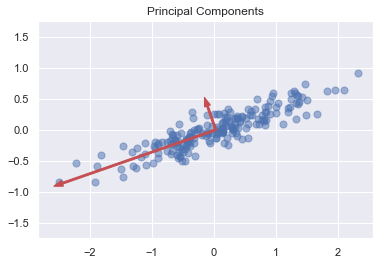

In [7]:
# plot the original data points
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5)

# plot arrows representing the principal components
plt.arrow(x=pca.mean_[0], y=pca.mean_[1],
          dx=3 * np.sqrt(S[0]) * U[0, 0],
          dy=3 * np.sqrt(S[0]) * U[0, 1],
          width=.03, head_width=.1, color='r')

plt.arrow(x=pca.mean_[0], y=pca.mean_[1],
          dx=3 * np.sqrt(S[1]) * U[1, 0],
          dy=3 * np.sqrt(S[1]) * U[1, 1],
          width=.03, head_width=.1, color='r')

plt.title("Principal Components")
 
# the aspect ratio of the plot should be equal, so the arrows are correctly displayed
plt.axis('equal')

plt.show()

Notice that one vector is longer than the other, which means that direction in the data is somehow more important than the other direction.

In other word, the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep one component.

In [8]:
pca = PCA(n_components=1) # keeping 1 component, keeps 97.63% of the information
# 0.76/(0.76+0.02) = 0.9763

# apply PCA to the original data X and project it onto the first principal component
X_proj = pca.fit_transform(X)

print(X.shape)
print(X_proj.shape)

(200, 2)
(200, 1)


The following plot visually compares the original data points (in blue) with their approximations obtained by projecting them onto the first principal component (in green). It demonstrates how the data points are represented in the reduced-dimensional space defined by the selected principal component.

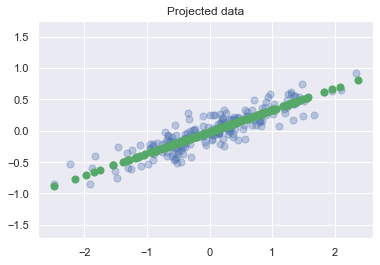

In [9]:
# plot original data (blue color)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.32)

# plot projected data (green color)
X_approx = pca.inverse_transform(X_proj)
plt.scatter(X_approx[:, 0], X_approx[:, 1], color='g', s=50)

plt.title("Projected data")
plt.axis('equal')
plt.show()

We see that after truncating 3% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

# PCA for visualization: Hand-written digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.

This code loads the digits dataset from scikit-learn, which contains images of handwritten digits along with their corresponding labels. 

In [10]:
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()
X, y = digits.data, digits.target

In the digits dataset, each handwritten digit image is represented as an 8x8 pixel grid, resulting in a total of 64 features (8x8 = 64). Therefore, the shape of the feature matrix X is (1797, 64), indicating that there are 1797 samples (images) and 64 features (pixels) for each sample.

In [12]:
print("Shape of original data:  {}".format(X.shape))

Shape of original data:  (1797, 64)


In [13]:
# creat a PCA object with 2 components
pca2d = PCA(n_components=2)  

# apply PCA to the original data X and project it onto the first principal component
X_proj_2d = pca2d.fit_transform(X)  # project from 64 to 2 dimensions

print("Shape of projected data into 2 components: {}".format(X_proj.shape))

Shape of projected data into 2 components: (200, 1)


In [14]:
# creat a PCA object with 3 components
pca3d = PCA(n_components=3)  

# apply PCA to the original data X and project it onto the first principal component
X_proj_3d = pca3d.fit_transform(X)  # project from 64 to 2 dimensions

print("Shape of projected data into 3 components: {}".format(X_proj.shape))

Shape of projected data into 3 components: (200, 1)


The following plots provide a visualization of the projected data points onto the first two and three principal components, with each data point colored according to its corresponding label. It helps in understanding the distribution of data points in the reduced-dimensional space defined by the selected principal components.

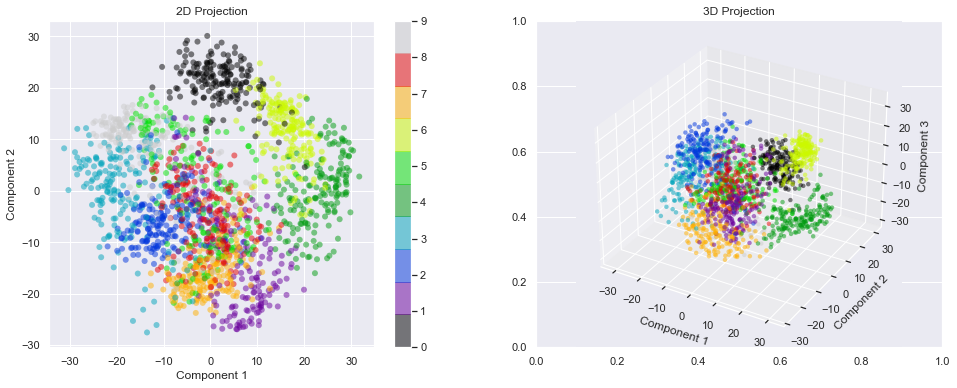

In [15]:
# create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting 2D projection------------------------------
ax1 = axes[0]

scatter1 = ax1.scatter(X_proj_2d[:, 0], X_proj_2d[:, 1],
                       c=y, edgecolor='none', alpha=0.5,
                       cmap=plt.cm.get_cmap('nipy_spectral', 10))

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_title('2D Projection')
fig.colorbar(scatter1, ax=ax1)

# Plotting 3D projection------------------------------
ax2 = axes[1]
ax2 = fig.add_subplot(122, projection='3d')

scatter = ax2.scatter(X_proj_3d[:, 0], X_proj_3d[:, 1], X_proj_3d[:, 2],
                      c=y, edgecolor='none', alpha=0.5,
                      cmap=plt.cm.get_cmap('nipy_spectral', 10))

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')
ax2.set_title('3D Projection')

plt.show()

### What do the Components Mean?
PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via eigenvectors. The input data is represented as a vector: in the case of the digits, our data is

<center>$x=[x_1, x_2, ..., x_{64}]$</center>

To construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image: <br> <br> 

<center>$\text{image}(x)=x_1.(\text{pixel 1}) + x_2.(\text{pixel 2}) + ... + x_{64}.(\text{pixel 64})$</center>

The pixel-wise representation is not the only choice. We can also use other basis functions: <br> <br> 

<center>$\text{image}(x)=\text{mean} + x_1.(\text{basis 1}) + x_2.(\text{basis 2}) + ... $</center>

What PCA does is to choose optimal basis functions so that only a few are needed to get a reasonable approximation.

## Choosing the number of components

How much information have we thrown away? We can figure this out by looking at the explained variance as a function of the number of components.

The following plot provides insights into how much variance is explained by each principal component individually and how much cumulative variance is explained by including multiple principal components. It creates a bar plot and a step plot to visualize the explained variance ratio and cumulative explained variance of the principal components obtained from PCA.

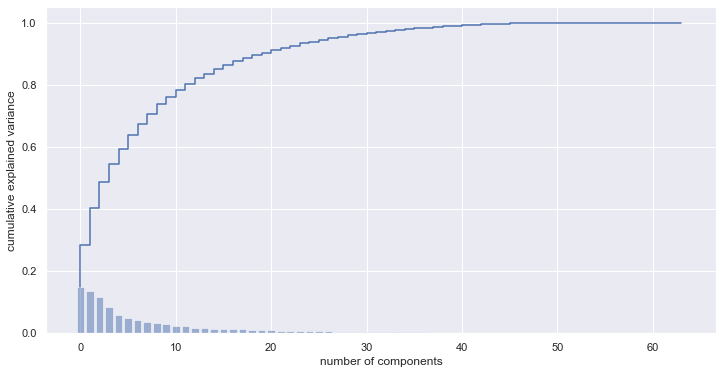

In [16]:
plt.figure(figsize=(12, 6))

# number of components is not so all components are kept
pca = PCA().fit(X)

# bar plot where each bar represents the explained variance ratio of a principal component
plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_, alpha=0.5)

# step plot showing the cumulative explained variance as more principal components are included
plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The following code snippet calculates and prints the total explained variance for different numbers of principal components. It prints the total explained variance for each specified number of components.

In [17]:
total_var = np.cumsum(pca.explained_variance_ratio_)

for i in [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]:
    print('with %2d principale components, total explained variance is %.2f.' %(i, total_var[i-1]))

with  1 principale components, total explained variance is 0.15.
with  2 principale components, total explained variance is 0.29.
with  3 principale components, total explained variance is 0.40.
with  4 principale components, total explained variance is 0.49.
with  5 principale components, total explained variance is 0.54.
with 10 principale components, total explained variance is 0.74.
with 15 principale components, total explained variance is 0.84.
with 20 principale components, total explained variance is 0.89.
with 30 principale components, total explained variance is 0.96.
with 40 principale components, total explained variance is 0.99.
with 50 principale components, total explained variance is 1.00.


Here, we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# PCA as Noise Filtering

PCA can indeed be used for noise filtering, especially in cases where the data has a high dimensionality and some of those dimensions are dominated by noise. If you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Here's a basic outline of how PCA can be applied for noise filtering:

1- **Perform PCA on the Data:**
   - Apply PCA to the original data to obtain the principal components.
   - Choose the number of principal components based on the amount of noise you want to filter out.

2- **Filtering out Noise:**
   - Remove the principal components corresponding to the noise by selecting only a subset of the principal components.
   - The noise is typically represented by the components with lower variance.
   
3- **Reconstructing the Data:**
   - Reconstruct the data using only the selected principal components.
   - Discarding the noise components should result in a denoised version of the data.

4- **Evaluate the Denoised Data:**
   - Assess the quality of the denoised data compared to the original data.
   - Use appropriate metrics or visual inspection to determine the effectiveness of the noise filtering.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

We've loaded the digits dataset from scikit-learn. This dataset contains grayscale images of handwritten digits from 0 to 9, each represented as an 8x8 pixel image.

In [19]:
# define a function to plot the digits from a given dataset
def plot_digits(dataset):

    # set up the figure
    fig = plt.figure(figsize=(10, 4))

    # plot the digits: each image is 8x8 pixels
    for i in range(40):
        ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(dataset[i].reshape(8,8), cmap=plt.cm.binary)

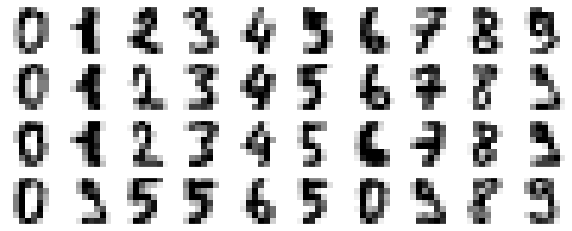

In [20]:
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it.

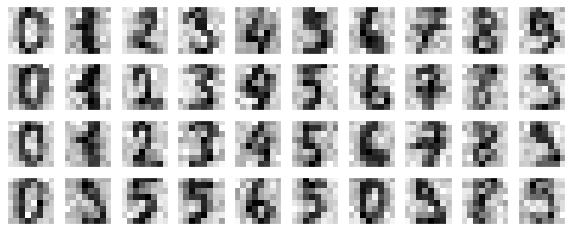

In [21]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

# Add random noise to the pixel values of each digit image in the dataset
# The noise is drawn from a normal distribution when mean is
# the original pixel values and standard deviation is 2
noisy = np.random.normal(digits.data, 2)

plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 70% of the variance in the data.

In [22]:
# Initialize a PCA object with the argument 0.7, indicating that
# the PCA transformation should capture 70% of the variance in the data
pca = PCA(0.7)

# Fit the PCA model to the noisy dataset
pca.fit(noisy)

# Retrieve the number of principal components to capture 70% of the variance in the data
pca.n_components_

13

Here 70% of the variance amounts to 13 principal components. This number indicates how many dimensions are needed to preserve the specified amount of information while reducing the dimensionality of the data.

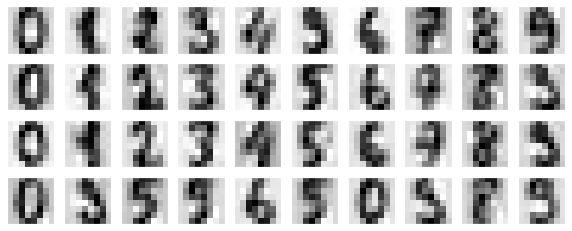

In [23]:
# Apply the PCA transformation to the noisy dataset,
# resulting in a reduced-dimensional representation of the data
components = pca.transform(noisy)

# Reconstruct the denoised images by inverse transforming the
# principal components back to the original feature space
filtered = pca.inverse_transform(components)


plot_digits(filtered)